<a href="https://colab.research.google.com/github/sherlockian4869/python/blob/main/kaggle/01_Titanic/Titanic_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
%cd '/content/drive/MyDrive/python/kaggle/Titanic/'

/content/drive/MyDrive/python/kaggle/Titanic


In [12]:
import pandas as pd
train = pd.read_csv('titanic/train.csv')

matplotlibとSeabornについて  
Qiita情報：https://qiita.com/hik0107/items/3dc541158fceb3156ee0  
matplotlibはできることが多いけど、扱うのが難しい  
seabornはmatplotlibをベースにしてるけど見栄えが良く、簡単　　

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


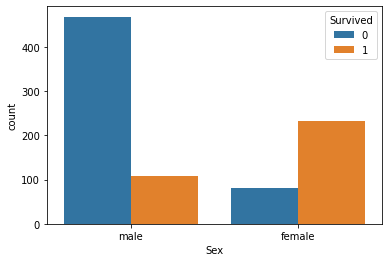

In [13]:
import matplotlib.pyplot as plt
#グラフ描画
import seaborn as sns
%matplotlib inline
sns.countplot('Sex', hue='Survived', data=train)

In [14]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
from sklearn.model_selection import train_test_split
# 欠損値処理
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')

# カテゴリ変数の変換
train['Sex'] = train['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

# dropは列または行を削除する
train = train.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis = 1)
print(train)
train_X = train.drop('Survived', axis = 1)
print(train_X)
train_y = train.Survived
print(train_y)
(train_X, test_X, train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    1  22.0      1      0   7.2500         0
1           1       1    0  38.0      1      0  71.2833         1
2           1       3    0  26.0      0      0   7.9250         0
3           1       1    0  35.0      1      0  53.1000         0
4           0       3    1  35.0      0      0   8.0500         0
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    1  27.0      0      0  13.0000         0
887         1       1    0  19.0      0      0  30.0000         0
888         0       3    0  28.0      1      2  23.4500         0
889         1       1    1  26.0      0      0  30.0000         1
890         0       3    1  32.0      0      0   7.7500         2

[891 rows x 8 columns]
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500         0
1         1    0  38.0      1      0  71.2833         1
2         3    0

In [16]:
#決定木
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [17]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.7947761194029851

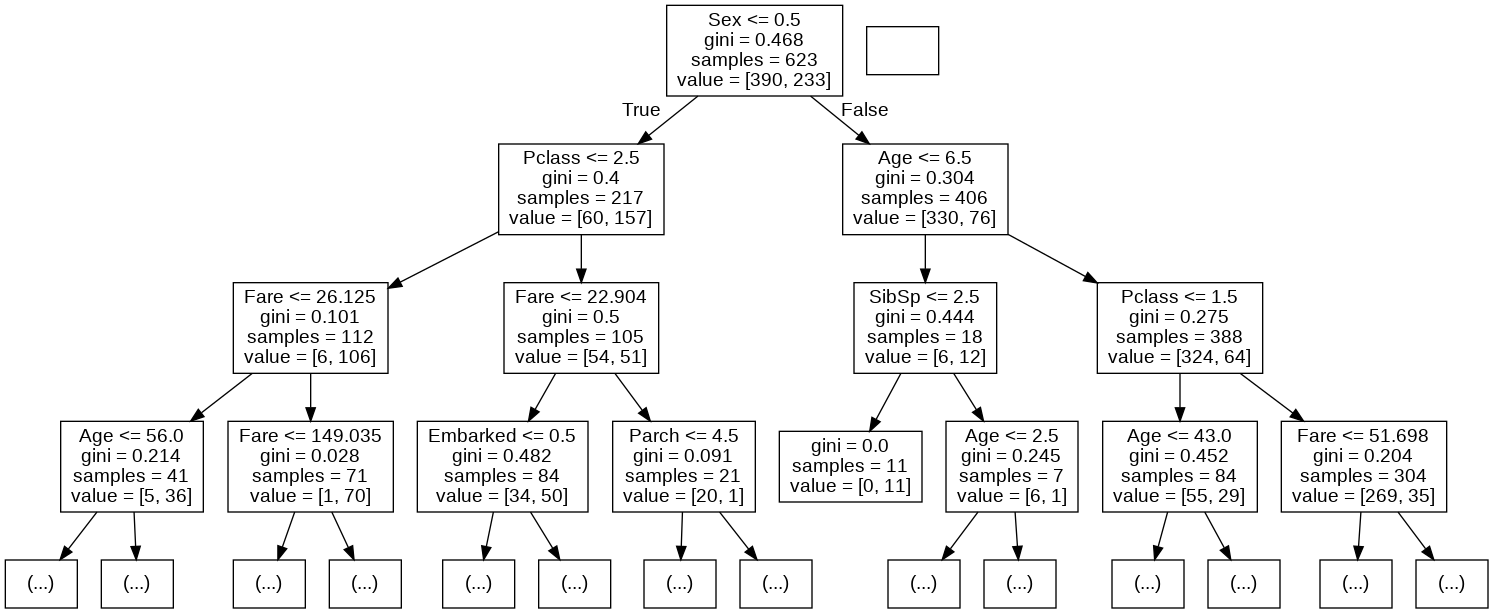

In [19]:
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn import tree
from io import StringIO

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())

In [20]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.8208955223880597

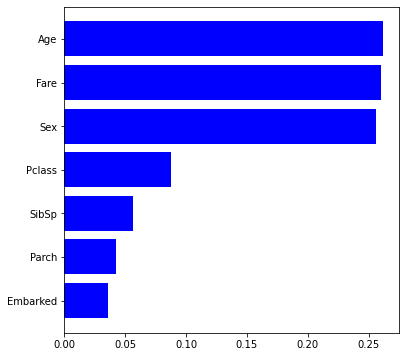

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

features = train_X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()